In [13]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from linearmodels import PanelOLS
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [14]:
data = pd.read_csv('working.csv')

In [15]:
df=data[['GenderSelect','Age_cat','FormalEducation','Major',\
        'Tenure','FirstTrainingSelect','EmploymentStatus',\
       'LearningCategoryWork','LearningCategorySelftTaught',\
       'LearningCategoryOnlineCourses','LearningCategoryUniversity',\
       'LearningCategoryKaggle']].dropna()

In [16]:
df['EmploymentStatus'].value_counts()

Looking for data science jobs    694
Employed full-time               589
Name: EmploymentStatus, dtype: int64

In [17]:
# filter_list = ['Employed full-time','Not employed, but looking for work']
# df_log=df1[df1.EmploymentStatus.isin(filter_list)]
df['status']=df['EmploymentStatus'].apply(lambda x: 1 if x=='Employed full-time' else 0)

In [18]:
df['Age_cat'].value_counts()

30 and less    601
30 - 40        388
40 - 50        176
over 50        118
Name: Age_cat, dtype: int64

In [19]:
df['status'].value_counts()

0    694
1    589
Name: status, dtype: int64

In [20]:
df['FirstTrainingSelect'].value_counts()

University courses                             442
Online courses (coursera, udemy, edx, etc.)    425
Self-taught                                    280
Work                                           88 
Other                                          28 
Kaggle competitions                            20 
Name: FirstTrainingSelect, dtype: int64

In [21]:
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

y, X = dmatrices("status ~ C(GenderSelect, Treatment(reference='Male'))\
+C(Age_cat)+C(Major)+C(FormalEducation)+C(Tenure)+C(FirstTrainingSelect, Treatment(reference='University courses'))", df)
logit = sm.Logit(y, X)
result = logit.fit(method='ncg')
result.summary2()

Optimization terminated successfully.
         Current function value: 0.424476
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                           Results: Logit
====================================================================================================================================================================
Model:                                                Logit                                             Pseudo R-squared:                                  0.385    
Dependent Variable:                                   status                                            AIC:                                               1143.2063
Date:                                                 2019-07-21 14:41                                  BIC:                                               1282.4441
No. Observations:                                     1283                                              Log-Likelihood:                                    -544.60  
Df Model:                                             26                                                LL-Null:                                           -885.01  
Df Residuals:                                         1256                                              Scale:                                             1.0000   
Converged:                                            1.0000                                                                                                        
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                  Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                         -1.4291   0.3226 -4.4295 0.0000   -2.0614  -0.7968
C(GenderSelect, Treatment(reference='Male'))[T.Female]                                                            -0.5826   0.1915 -3.0426 0.0023   -0.9578  -0.2073
C(Age_cat)[T.30 and less]                                                                                         -0.3523   0.2009 -1.7535 0.0795   -0.7461   0.0415
C(Age_cat)[T.40 - 50]                                                                                             -0.8153   0.2567 -3.1755 0.0015   -1.3185  -0.3121
C(Age_cat)[T.over 50]                                                                                             -1.9626   0.3200 -6.1339 0.0000   -2.5897  -1.3355
C(Major)[T.Engineering]                                                                                            0.4499   0.2358  1.9081 0.0564   -0.0122   0.9121
C(Major)[T.Health Science and Biology]                                                                             1.0239   0.3749  2.7311 0.0063    0.2891   1.7586
C(Major)[T.Humanities and Art]                                                                                     1.6062   0.4453  3.6065 0.0003    0.7333   2.4790
C(Major)[T.Information Technology and Managment]                                                                   0.1846   0.4398  0.4196 0.6748   -0.6775   1.0466
C(Major)[T.Mathematics or statistics]                                                                              1.2986   0.2472  5.2531 0.0000    0.8141   1.7831
C(Major)[T.No declared major]                                                                                      0.5027   1.3180  0.3814 0.7029   -2.0804   3.0859
C(Major)[T.Other]                                                                                                  0.7703   0.3407  2.2612 0.0237    0.1026   1.4380
C(Major)[T.Physics]                                               

In [80]:
def probability(gender='Male',age_group='30-40',\
                major='Computer Science',\
                education='Bachelor', tenure='1 to 2 years'):
        param=result.params[0]
        if gender=='Female':
            param+=result.params[1]
        else:
            pass
        if age_group=='30 and less':
                param+=result.params[2]
        elif age_group=='40-50':
                param+=result.params[3]
        elif age_group=='over 50':
                param+=result.params[4]
        else: 
            pass
        if major=='Engineering':
                param+=result.params[5]
        elif major=='Health Science or Biology':
                param+=result.params[6]
        elif major=='Humanities and Art':
                param+=result.params[7]
        elif major=='Information Technology and Managment':
                param+=result.params[8]
        elif major=='Mathematics or Statistics':
                param+=result.params[9]
        elif major=='No declared major':
                param+=result.params[10]
        elif major=='Other':
                param+=result.params[11]
        elif major=='Physics':
                param+=result.params[12]
        elif major=='Social Science':
                param+=result.params[13]
        else: 
            pass
        if education=='Doctoral degree':
                param+=result.params[14]
        elif education=="Master's degree":
                param+=result.params[15]
        else:
            pass
        if tenure=='6 to 10 years':
            param+=result.params[18]
        else:
            pass
        probability= int (round((np.exp(param)/(1+np.exp(param)))*100,0))
        return probability



In [81]:
def df_prob(major, education,tenure):
    gender=['Male','Female']
    age=['30 and less','30-40','40-50','over 50']
    probs_s_b=[]
    for g in gender:
        for a in age:
            probs_s_b.append(probability(g, a, major, education, tenure))
    age_group=['30 and less','30-40','40-50','over 50']*2
    gender=['male']*4+['female']*4
    df = pd.DataFrame(list(zip(age_group,probs, gender)),\
                      columns=['age','prob', 'gender'])
    df_prob=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
    reset_index().iloc[:,1:].sort_index()
    return df_prob


In [82]:
df_prob('Mathematics or Statistics', "Doctoral degree",'1 to 2 years')

gender,age,female,male
0,30 and less,38,53
1,30-40,47,61
2,40-50,28,41
3,over 50,11,18


In [83]:
df_d

gender,age,female,male
0,30 and less,38,53
1,30-40,47,61
2,40-50,28,41
3,over 50,11,18


In [78]:
#Computer Science, Bachelors's degree, 1-2 years of coding
# [lists]gender age 

# gender=['Male','Female']
# age=['30 and less','30-40','40-50','over 50']
# major=['Mathematics or Statistics']
# degree=['Bachelor']

prob_male_30_less=probability('Male','30 and less','Mathematics or Statistics', "Bachelor")
prob_male_30_40=probability('Male','30-40','Mathematics or Statistics', "Bachelor")
prob_male_40_50=probability('Male','40-50','Mathematics or Statistics', "Bachelor")
prob_male_over_50=probability('Male','over 50','Mathematics or Statistics', "Bachelor")

prob_female_30_less=probability('Female','30 and less','Mathematics or Statistics', "Bachelor")
prob_female_30_40=probability('Female','30-40','Mathematics or Statistics', "Bachelor")
prob_female_40_50=probability('Female','40-50','Mathematics or Statistics', "Bachelor")
prob_female_over_50=probability('Female','over 50','Mathematics or Statistics', "Bachelor")

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(list(zip(age_group,probs, gender)), columns=['age','prob', 'gender'])
df_b=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Master's degree, 1-2 years of coding

prob_male_30_less=probability('Male','30 and less','Mathematics or Statistics', "Master's degree")
prob_male_30_40=probability('Male','30-40','Mathematics or Statistics', "Master's degree")
prob_male_40_50=probability('Male','40-50','Mathematics or Statistics', "Master's degree")
prob_male_over_50=probability('Male','over 50','Mathematics or Statistics', "Master's degree")

prob_female_30_less=probability('Female','30 and less','Mathematics or Statistics', "Master's degree")
prob_female_30_40=probability('Female','30-40','Mathematics or Statistics', "Master's degree")
prob_female_40_50=probability('Female','40-50','Mathematics or Statistics', "Master's degree")
prob_female_over_50=probability('Female','over 50','Mathematics or Statistics', "Master's degree")

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_m=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Doctoral degree, 1-2 years of coding

prob_male_30_less=probability('Male','30 and less','Mathematics or Statistics', "Doctoral degree")
prob_male_30_40=probability('Male','30-40','Mathematics or Statistics', "Doctoral degree")
prob_male_40_50=probability('Male','40-50','Mathematics or Statistics', "Doctoral degree")
prob_male_over_50=probability('Male','over 50','Mathematics or Statistics', "Doctoral degree")

prob_female_30_less=probability('Female','30 and less','Mathematics or Statistics', "Doctoral degree")
prob_female_30_40=probability('Female','30-40','Mathematics or Statistics', "Doctoral degree")
prob_female_40_50=probability('Female','40-50','Mathematics or Statistics', "Doctoral degree")
prob_female_over_50=probability('Female','over 50','Mathematics or Statistics', "Doctoral degree")

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_d=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()



In [46]:
probs_female

[38, 47, 28, 11]

In [752]:
df_d

gender,age,female,male
0,30 and less,14,23
1,30-40,19,30
2,40-50,10,16
3,over 50,3,6


In [748]:
prob_male_30_less

77

In [762]:
x = [100,2,300,4,75]
dct = {}
for i in x:
    dct['lst_%s' % i] = i
    k = list(dct.values())
k

[100, 2, 300, 4, 75]

In [ ]:
https://stackoverflow.com/questions/14819849/create-lists-of-unique-names-in-a-for-loop-in-python

In [738]:
#Computer Science, Bachelors's degree, 6-10 years of coding

prob_male_30_less=probability('Male','30 and less','Mathematics or Statistics', "Bachelor",'6 to 10 years')
prob_male_30_40=probability('Male','30-40','Mathematics or Statistics', "Bachelor",'6 to 10 years')
prob_male_40_50=probability('Male','40-50','Mathematics or Statistics', "Bachelor",'6 to 10 years')
prob_male_over_50=probability('Male','over 50','Mathematics or Statistics', "Bachelor",'6 to 10 years')

prob_female_30_less=probability('Female','30 and less','Mathematics or Statistics', "Bachelor",'6 to 10 years')
prob_female_30_40=probability('Female','30-40','Mathematics or Statistics', "Bachelor",'6 to 10 years')
prob_female_40_50=probability('Female','40-50','Mathematics or Statistics', "Bachelor",'6 to 10 years')
prob_female_over_50=probability('Female','over 50','Mathematics or Statistics', "Bachelor",'6 to 10 years')

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_b_6_10=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Master's degree, 6-10 years of coding

prob_male_30_less=probability('Male','30 and less','Mathematics or Statistics', "Master's degree",'6 to 10 years')
prob_male_30_40=probability('Male','30-40','Mathematics or Statistics', "Master's degree",'6 to 10 years')
prob_male_40_50=probability('Male','40-50','Mathematics or Statistics', "Master's degree",'6 to 10 years')
prob_male_over_50=probability('Male','over 50','Mathematics or Statistics', "Master's degree",'6 to 10 years')

prob_female_30_less=probability('Female','30 and less','Mathematics or Statistics', "Master's degree",'6 to 10 years')
prob_female_30_40=probability('Female','30-40','Mathematics or Statistics', "Master's degree",'6 to 10 years')
prob_female_40_50=probability('Female','40-50','Mathematics or Statistics', "Master's degree",'6 to 10 years')
prob_female_over_50=probability('Female','over 50','Mathematics or Statistics', "Master's degree",'6 to 10 years')

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_m_6_10=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Doctoral degree, 6-10 years of coding

prob_male_30_less=probability('Male','30 and less','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')
prob_male_30_40=probability('Male','30-40','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')
prob_male_40_50=probability('Male','40-50','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')
prob_male_over_50=probability('Male','over 50','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')

prob_female_30_less=probability('Female','30 and less','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')
prob_female_30_40=probability('Female','30-40','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')
prob_female_40_50=probability('Female','40-50','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')
prob_female_over_50=probability('Female','over 50','Mathematics or Statistics', "Doctoral degree",'6 to 10 years')

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_d_6_10=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

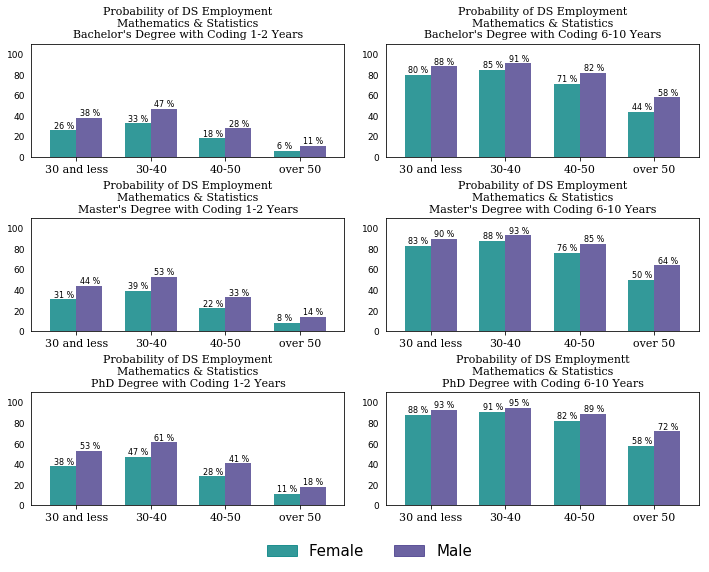

In [739]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,7))
plt.tight_layout(h_pad=4)


df_b[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[0,0],\
                              fontsize=13, alpha=.8,width=.7)
ax[0,0].set_title("Probability of DS Employment\nMathematics & \
Statistics\nBachelor's Degree with Coding 1-2 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[0,0].patches:
        ax[0,0].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
        
leg=ax[0,0].legend(['Female','Male'],  loc='best', \
          fontsize=10,ncol=2,prop={'size':15},\
                   bbox_to_anchor=(1.45, -3.3),labelspacing=5)
leg.legendHandles[1].set_color('darkslateblue')
leg.legendHandles[0].set_color('teal')
# leg.handlelength(6)
# leg.handlelength(6)

leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
ax[0,0].tick_params(axis='y', labelsize=9)
ax[0,0].set_facecolor('white')
ax[0,0].yaxis.set_ticks_position('none')
ax[0,0].set_ylim([0,110])
ax[0,0].tick_params(axis='y', which='minor', labelsize=1)
ax[0,0].set_xticklabels(df_b['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')


df_m[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[1,0],fontsize=13, alpha=.8,width=.7)
ax[1,0].set_title("Probability of DS Employment\nMathematics & \
Statistics\nMaster's Degree with Coding 1-2 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[1,0].patches:
        ax[1,0].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
leg=ax[1,0].legend().set_visible(False)
ax[1,0].set_facecolor('white')
ax[1,0].yaxis.set_ticks_position('none')
ax[1,0].set_ylim([0,110])
ax[1,0].tick_params(axis='y', labelsize=9)
ax[1,0].tick_params(axis='y', which='minor', labelsize=1)
ax[1,0].set_xticklabels(df_m['age'].sort_index(),
  size =11,family='serif', color='black',rotation='horizontal')

df_d[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[2,0],fontsize=13, alpha=.8,width=.7)

ax[2,0].set_title("Probability of DS Employment\nMathematics & \
Statistics\nPhD Degree with Coding 1-2 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[2,0].patches:
        ax[2,0].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)           
leg=ax[2,0].legend().set_visible(False)
ax[2,0].set_facecolor('white')
ax[2,0].yaxis.set_ticks_position('none')
ax[2,0].set_ylim([0,110])
ax[2,0].tick_params(axis='y', labelsize=9)
ax[2,0].set_xticklabels(df_m['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')



df_b_6_10[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[0,1],fontsize=13, alpha=.8,width=.7)
ax[0,1].set_title("Probability of DS Employment\nMathematics & \
Statistics\nBachelor's Degree with Coding 6-10 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[0,1].patches:
        ax[0,1].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
        
# leg=ax[0,1].legend(['Male','Female'],  loc='lower right', \
#           fontsize=10,prop={'size':13},bbox_to_anchor=(1.3, .05))
# leg.legendHandles[0].set_color('darkslateblue')
# leg.legendHandles[1].set_color('teal')
# leg.get_frame().set_facecolor('none')
# leg.get_frame().set_edgecolor('none')
ax[0,1].tick_params(axis='y', labelsize=9)
leg=ax[0,1].legend().set_visible(False)
ax[0,1].set_facecolor('white')
ax[0,1].yaxis.set_ticks_position('none')
ax[0,1].set_ylim([0,110])
ax[0,1].tick_params(axis='y', which='minor', labelsize=1)
ax[0,1].set_xticklabels(df_b['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')


df_m_6_10[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[1,1],fontsize=13, alpha=.8,width=.7)
ax[1,1].set_title("Probability of DS Employment\nMathematics & \
Statistics\nMaster's Degree with Coding 6-10 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[1,1].patches:
        ax[1,1].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
leg=ax[1,1].legend().set_visible(False)
ax[1,1].set_facecolor('white')
ax[1,1].yaxis.set_ticks_position('none')
ax[1,1].set_ylim([0,110])
ax[1,1].tick_params(axis='y', labelsize=9)
ax[1,1].tick_params(axis='y', which='minor', labelsize=1)
ax[1,1].set_xticklabels(df_m['age'].sort_index(),
  size =11,family='serif', color='black',rotation='horizontal')

df_d_6_10[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[2,1],fontsize=13, alpha=.8,width=.7)

ax[2,1].set_title("Probability of DS Employmentt\nMathematics & \
Statistics\nPhD Degree with Coding 6-10 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[2,1].patches:
        ax[2,1].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)           
leg=ax[2,1].legend().set_visible(False)
ax[2,1].set_facecolor('white')
ax[2,1].yaxis.set_ticks_position('none')
ax[2,1].set_ylim([0,110])
ax[2,1].tick_params(axis='y', labelsize=9)
ax[2,1].set_xticklabels(df_m['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')

plt.show()
plt.show()

In [744]:
#Computer Science, Bachelors's degree, 1-2 years of coding

prob_male_30_less=probability('Male','30 and less','Computer Science', "Bachelor")
prob_male_30_40=probability('Male','30-40','Computer Science', "Bachelor")
prob_male_40_50=probability('Male','40-50','Computer Science', "Bachelor")
prob_male_over_50=probability('Male','over 50','Computer Science', "Bachelor")

prob_female_30_less=probability('Female','30 and less','Computer Science', "Bachelor")
prob_female_30_40=probability('Female','30-40','Computer Science', "Bachelor")
prob_female_40_50=probability('Female','40-50','Computer Science', "Bachelor")
prob_female_over_50=probability('Female','over 50','Computer Science', "Bachelor")

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_b=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Master's degree, 1-2 years of coding

prob_male_30_less=probability('Male','30 and less','Computer Science', "Master's degree")
prob_male_30_40=probability('Male','30-40','Computer Science', "Master's degree")
prob_male_40_50=probability('Male','40-50','Computer Science', "Master's degree")
prob_male_over_50=probability('Male','over 50','Computer Science', "Master's degree")

prob_female_30_less=probability('Female','30 and less','Computer Science', "Master's degree")
prob_female_30_40=probability('Female','30-40','Computer Science', "Master's degree")
prob_female_40_50=probability('Female','40-50','Computer Science', "Master's degree")
prob_female_over_50=probability('Female','over 50','Computer Science', "Master's degree")

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_m=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Doctoral degree, 1-2 years of coding

prob_male_30_less=probability('Male','30 and less','Computer Science', "Doctoral degree")
prob_male_30_40=probability('Male','30-40','Computer Science', "Doctoral degree")
prob_male_40_50=probability('Male','40-50','Computer Science', "Doctoral degree")
prob_male_over_50=probability('Male','over 50','Computer Science', "Doctoral degree")

prob_female_30_less=probability('Female','30 and less','Computer Science', "Doctoral degree")
prob_female_30_40=probability('Female','30-40','Computer Science', "Doctoral degree")
prob_female_40_50=probability('Female','40-50','Computer Science', "Doctoral degree")
prob_female_over_50=probability('Female','over 50','Computer Science', "Doctoral degree")

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_d=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()



In [745]:
#Computer Science, Bachelors's degree, 6-10 years of coding

prob_male_30_less=probability('Male','30 and less','Computer Science', "Bachelor",'6 to 10 years')
prob_male_30_40=probability('Male','30-40','Computer Science', "Bachelor",'6 to 10 years')
prob_male_40_50=probability('Male','40-50','Computer Science', "Bachelor",'6 to 10 years')
prob_male_over_50=probability('Male','over 50','Computer Science', "Bachelor",'6 to 10 years')

prob_female_30_less=probability('Female','30 and less','Computer Science', "Bachelor",'6 to 10 years')
prob_female_30_40=probability('Female','30-40','Computer Science', "Bachelor",'6 to 10 years')
prob_female_40_50=probability('Female','40-50','Computer Science', "Bachelor",'6 to 10 years')
prob_female_over_50=probability('Female','over 50','Computer Science', "Bachelor",'6 to 10 years')

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_b_6_10=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Master's degree, 6-10 years of coding

prob_male_30_less=probability('Male','30 and less','Computer Science', "Master's degree",'6 to 10 years')
prob_male_30_40=probability('Male','30-40','Computer Science', "Master's degree",'6 to 10 years')
prob_male_40_50=probability('Male','40-50','Computer Science', "Master's degree",'6 to 10 years')
prob_male_over_50=probability('Male','over 50','Computer Science', "Master's degree",'6 to 10 years')

prob_female_30_less=probability('Female','30 and less','Computer Science', "Master's degree",'6 to 10 years')
prob_female_30_40=probability('Female','30-40','Computer Science', "Master's degree",'6 to 10 years')
prob_female_40_50=probability('Female','40-50','Computer Science', "Master's degree",'6 to 10 years')
prob_female_over_50=probability('Female','over 50','Computer Science', "Master's degree",'6 to 10 years')

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_m_6_10=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

#Computer Science, Doctoral degree, 6-10 years of coding

prob_male_30_less=probability('Male','30 and less','Computer Science', "Doctoral degree",'6 to 10 years')
prob_male_30_40=probability('Male','30-40','Computer Science', "Doctoral degree",'6 to 10 years')
prob_male_40_50=probability('Male','40-50','Computer Science', "Doctoral degree",'6 to 10 years')
prob_male_over_50=probability('Male','over 50','Computer Science', "Doctoral degree",'6 to 10 years')

prob_female_30_less=probability('Female','30 and less','Computer Science', "Doctoral degree",'6 to 10 years')
prob_female_30_40=probability('Female','30-40','Computer Science', "Doctoral degree",'6 to 10 years')
prob_female_40_50=probability('Female','40-50','Computer Science', "Doctoral degree",'6 to 10 years')
prob_female_over_50=probability('Female','over 50','Computer Science', "Doctoral degree",'6 to 10 years')

probs_male=[prob_male_30_less,prob_male_30_40,prob_male_40_50,
                               prob_male_over_50]
probs_female=[prob_female_30_less,prob_female_30_40,prob_female_40_50,
                               prob_female_over_50]
probs=probs_male+probs_female
age_group=['30 and less','30-40','40-50','over 50']*2
gender=['male']*4+['female']*4
d=list(zip(age_group,probs, gender))
df = pd.DataFrame(d, columns=['age','prob', 'gender'])
df_d_6_10=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_index()

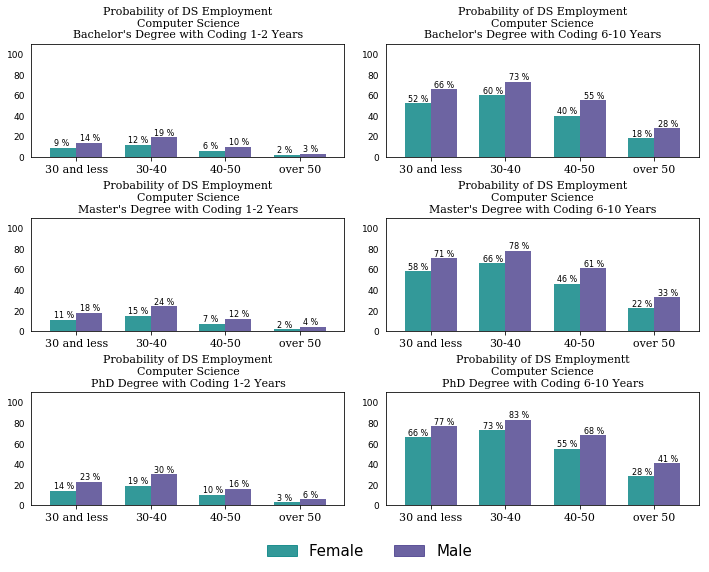

In [747]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,7))
plt.tight_layout(h_pad=4)


df_b[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[0,0],\
                              fontsize=13, alpha=.8,width=.7)
ax[0,0].set_title("Probability of DS Employment\nComputer \
Science\nBachelor's Degree with Coding 1-2 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[0,0].patches:
        ax[0,0].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
        
leg=ax[0,0].legend(['Female','Male'],  loc='best', \
          fontsize=10,ncol=2,prop={'size':15},\
                   bbox_to_anchor=(1.45, -3.3),labelspacing=5)
leg.legendHandles[1].set_color('darkslateblue')
leg.legendHandles[0].set_color('teal')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
ax[0,0].tick_params(axis='y', labelsize=9)
ax[0,0].set_facecolor('white')
ax[0,0].yaxis.set_ticks_position('none')
ax[0,0].set_ylim([0,110])
ax[0,0].tick_params(axis='y', which='minor', labelsize=1)
ax[0,0].set_xticklabels(df_b['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')


df_m[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[1,0],fontsize=13, alpha=.8,width=.7)
ax[1,0].set_title("Probability of DS Employment\nComputer \
Science\nMaster's Degree with Coding 1-2 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[1,0].patches:
        ax[1,0].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
leg=ax[1,0].legend().set_visible(False)
ax[1,0].set_facecolor('white')
ax[1,0].yaxis.set_ticks_position('none')
ax[1,0].set_ylim([0,110])
ax[1,0].tick_params(axis='y', labelsize=9)
ax[1,0].tick_params(axis='y', which='minor', labelsize=1)
ax[1,0].set_xticklabels(df_m['age'].sort_index(),
  size =11,family='serif', color='black',rotation='horizontal')

df_d[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[2,0],fontsize=13, alpha=.8,width=.7)

ax[2,0].set_title("Probability of DS Employment\nComputer \
Science\nPhD Degree with Coding 1-2 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[2,0].patches:
        ax[2,0].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)           
leg=ax[2,0].legend().set_visible(False)
ax[2,0].set_facecolor('white')
ax[2,0].yaxis.set_ticks_position('none')
ax[2,0].set_ylim([0,110])
ax[2,0].tick_params(axis='y', labelsize=9)
ax[2,0].set_xticklabels(df_m['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')



df_b_6_10[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[0,1],fontsize=13, alpha=.8,width=.7)
ax[0,1].set_title("Probability of DS Employment\nComputer \
Science\nBachelor's Degree with Coding 6-10 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[0,1].patches:
        ax[0,1].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
ax[0,1].tick_params(axis='y', labelsize=9)
leg=ax[0,1].legend().set_visible(False)
ax[0,1].set_facecolor('white')
ax[0,1].yaxis.set_ticks_position('none')
ax[0,1].set_ylim([0,110])
ax[0,1].tick_params(axis='y', which='minor', labelsize=1)
ax[0,1].set_xticklabels(df_b['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')


df_m_6_10[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[1,1],fontsize=13, alpha=.8,width=.7)
ax[1,1].set_title("Probability of DS Employment\nComputer \
Science\nMaster's Degree with Coding 6-10 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[1,1].patches:
        ax[1,1].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)      
leg=ax[1,1].legend().set_visible(False)
ax[1,1].set_facecolor('white')
ax[1,1].yaxis.set_ticks_position('none')
ax[1,1].set_ylim([0,110])
ax[1,1].tick_params(axis='y', labelsize=9)
ax[1,1].tick_params(axis='y', which='minor', labelsize=1)
ax[1,1].set_xticklabels(df_m['age'].sort_index(),
  size =11,family='serif', color='black',rotation='horizontal')

df_d_6_10[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax[2,1],fontsize=13, alpha=.8,width=.7)

ax[2,1].set_title("Probability of DS Employmentt\nComputer \
Science\nPhD Degree with Coding 6-10 Years",\
                  x=.5, fontsize=11,family='serif')
for i in ax[2,1].patches:
        ax[2,1].text( i.get_x()+.05,i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=8)           
leg=ax[2,1].legend().set_visible(False)
ax[2,1].set_facecolor('white')
ax[2,1].yaxis.set_ticks_position('none')
ax[2,1].set_ylim([0,110])
ax[2,1].tick_params(axis='y', labelsize=9)
ax[2,1].set_xticklabels(df_m['age'].sort_index(),
                      size =11,family='serif', color='black',rotation='horizontal')

plt.show()
plt.show()